In [2]:
from sympy import *
init_printing(use_unicode=True)

In [3]:
r, theta, phi = symbols('r, \\theta, \phi')
M = symbols('M')
psi = Function(Symbol('\psi', real=True))
coords = [ r, theta, phi ]

In [4]:
metric = Matrix([
    [ 1, 0, 0 ],
    [ 0, r ** 2, 0 ],
    [ 0, 0, r ** 2 * sin(theta)]
])

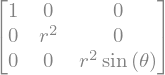

In [5]:
metric

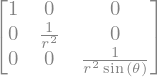

In [33]:
inv_metric = metric.inv()
inv_metric

In [6]:
def compute_christoffel(metric):
    if metric.shape != (3, 3):
        raise Exception("Invalid dimensions")

    inv_metric = metric.inv()
    
    out = []
    for i in range(0, 3):
        rows = []
        for j in range(0, 3):
            row = []
            for k in range(0, 3):
                res = 0.0
                for l in range(0, 3):
                    res += inv_metric[i, l] * (
                        Derivative(metric[l, j], coords[k]) +
                        Derivative(metric[l, k], coords[j]) -
                        Derivative(metric[j, k], coords[l]))
                row.append(res / 2)
            rows.append(row)
        out.append(Matrix(rows).applyfunc(simplify))
    return out

In [8]:
def compute_ricci(christoffel):
    if len(christoffel) != 3 or christoffel[0].shape != (3, 3):
        raise Exception("Invalid dimensions")
    rows = []
    for i in range(0, 3):
        row = []
        for j in range(0, 3):
            res = 0.0
            for k in range(0, 3):
                res += Derivative(christoffel[k][i, j], coords[k])
                res -= Derivative(christoffel[k][k, j], coords[i])
                for l in range(0, 3):
                    res += christoffel[k][i, j] * christoffel[l][k, l]
                    res -= christoffel[k][i, l] * christoffel[l][j, k]
            row.append(res)
        rows.append(row)
    return Matrix(rows).applyfunc(simplify) 

In [9]:
christoffel = compute_christoffel(metric)

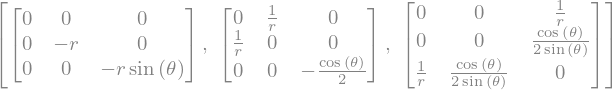

In [11]:
christoffel

In [29]:
# Compute covariant derivative of rank-0 tensor
def compute_diff_scalar(s, christoffel):
    if len(christoffel) != 3:
        raise Exception('Invalid dimensions')

    return Matrix([ diff(s, x) for x in coords ]).applyfunc(simplify)

# Compute covariant derivative of rank-1 covariant tensor
def compute_diff_vec_lo(t, christoffel):
    if len(t) != 3 or len(christoffel) != 3:
        raise Exception('Invalid dimensions')

    rows = []
    for i in range(0, 3):
        row = []
        for j in range(0, 3):
            res = diff(t[i], coords[j])
            for k in range(0, 3):
                res -= christoffel[k][i, j] * t[k]
            row.append(res)
        rows.append(row)
    return Matrix(rows).applyfunc(simplify)

# Compute covariant derivative of rank-2 covariant tensor
def compute_diff_matrix_lo(m, christoffel):
    if m.shape != (3, 3) or len(christoffel) != 3:
        raise Exception('Invalid dimensions')

    out = []
    for i in range(0, 3):
        rows = []
        for j in range(0, 3):
            row = []
            for k in range(0, 3):
                res = diff(m[j, k], coords[i])
                for l in range(0, 3):
                    res -= christoffel[l][i, j] * m[l, k]
                    res -= christoffel[l][i, k] * m[j, l]
                row.append(res)
            rows.append(row)
        out.append(Matrix(rows).applyfunc(simplify))
    return out

In [22]:
W_r = Function(Symbol('W_r', real=True))
W = Matrix([ W_r(r), 0, 0 ])

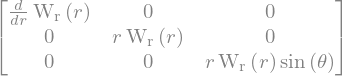

In [23]:
DW = compute_diff_vec_lo(W, christoffel)
DW

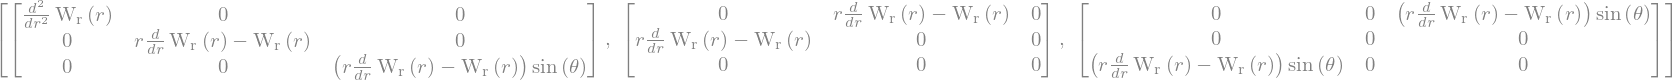

In [25]:
DDW = compute_diff_matrix_lo(DW, christoffel)
DDW

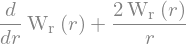

In [34]:
divW = Trace(inv_metric * DW).simplify()
divW

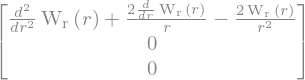

In [31]:
DdivW = compute_diff_scalar(divW, christoffel)
DdivW

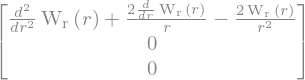

In [54]:
def compute_D2W():
    column = []
    for i in range(0, 3):
        val = 0.0
        for j in range(0, 3):
            for k in range(0, 3):
                val += inv_metric[j, k] * DDW[k][j, i]
        column.append(val)
    return Matrix(column).applyfunc(simplify)
D2W = compute_D2W()
D2W

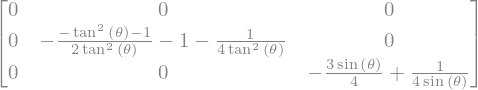

In [41]:
ricci = compute_ricci(christoffel)
ricci

In [42]:
ricci * inv_metric * W

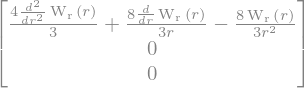

In [60]:
Delta_L = D2W + DdivW / 3
Delta_L

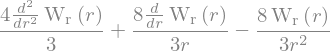

In [68]:
(4 * Derivative(1 / r ** 2 * Derivative(r ** 2 * W_r(r), r), r) / 3).simplify()